## Lung Cancer Detection using Machine Learning
### Using Survey Data

Loading the Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('data.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

#### For Simplicity Sake, we make all the feature names in lowercase and also replace the space with underscores.

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [6]:
df["lung_cancer"].unique()

array(['YES', 'NO'], dtype=object)

In [7]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

#### Mapping Categorical Values to Numerical Values

In [8]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

df['lung_cancer'] = df['lung_cancer'].map({'NO': 0, 'YES': 1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 309 non-null    int64
 1   age                    309 non-null    int64
 2   smoking                309 non-null    int64
 3   yellow_fingers         309 non-null    int64
 4   anxiety                309 non-null    int64
 5   peer_pressure          309 non-null    int64
 6   chronic_disease        309 non-null    int64
 7   fatigue                309 non-null    int64
 8   allergy                309 non-null    int64
 9   wheezing               309 non-null    int64
 10  alcohol_consuming      309 non-null    int64
 11  coughing               309 non-null    int64
 12  shortness_of_breath    309 non-null    int64
 13  swallowing_difficulty  309 non-null    int64
 14  chest_pain             309 non-null    int64
 15  lung_cancer            309 non-null    i

In [10]:
print ('Healthy : {} '.format(df.lung_cancer.value_counts()[0]))
print ('On Risk : {} '.format(df.lung_cancer.value_counts()[1]))

Healthy : 39 
On Risk : 270 


#### Generating a HeatMap for the features

<Axes: >

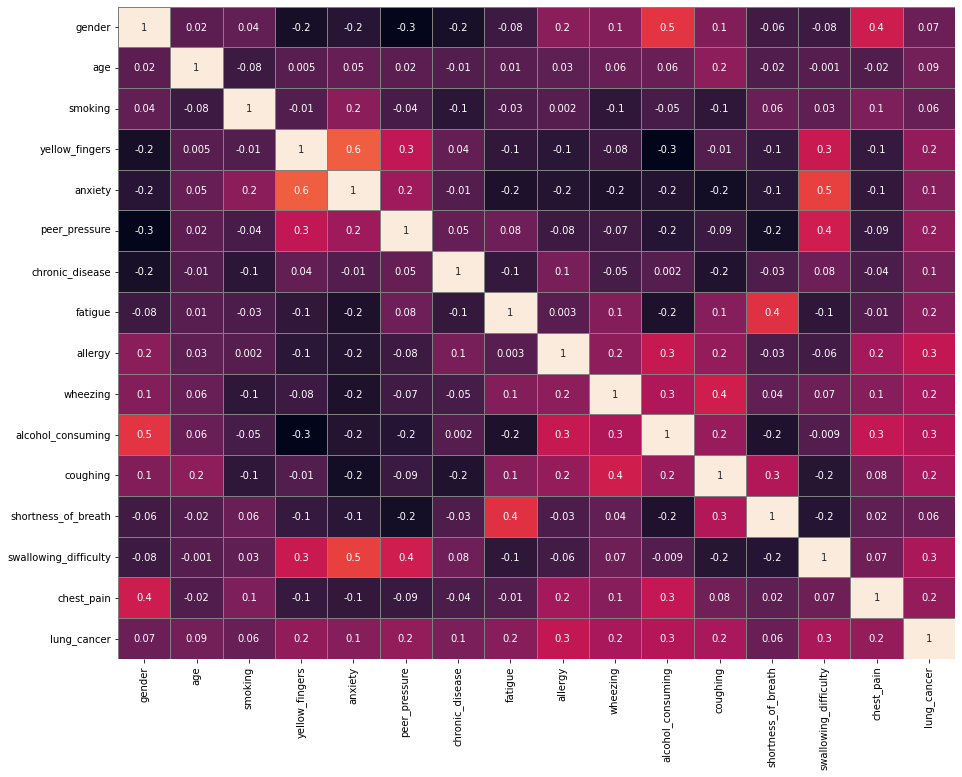

In [11]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

([<matplotlib.patches.Wedge at 0x2acbdf0d940>,
 [Text(-1.0146551535005641, 0.42482339798408836, '1'),
  Text(1.0146551336131444, -0.42482344548352374, '0')],
 [Text(-0.5534482655457621, 0.23172185344586632, '87.4%'),
  Text(0.5534482546980787, -0.23172187935464927, '12.6%')])

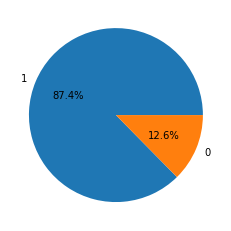

In [12]:
values = df['lung_cancer'].value_counts().tolist()
names = list(dict(df['lung_cancer'].value_counts()).keys())
plt.pie(values, labels = names,autopct='%1.1f%%')


#### Separating the Features and the Target Variables into X and y

In [13]:
X = df.drop("lung_cancer", axis=1)
X.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [14]:
y = df["lung_cancer"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: lung_cancer, dtype: int64

##### Sampling to Balance the Unbalanced Data

In [15]:
over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((540, 15), (540,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [17]:
len(X_train), len(X_test)

(432, 108)

##### Data Scaling

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Model Accuracy :",LinearRegressionScore*100)

Model Accuracy : 64.04214644616874
